In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 讀取數據
train = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\無氣提.csv") 

print (train)
train.head(5)



     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  7.03  35.0                     -          NaN                  NaN   
1       1  7.08  35.0                   43%        12.47                  NaN   
2       2  7.22  35.0                   53%        12.47               108.97   
3       3  7.22  35.0                   50%        12.47                  NaN   
4       4  7.24  35.0                   49%        12.47               108.97   
5       5  7.24  35.0                   49%        12.47                  NaN   
6       6  7.25  35.0                   48%        12.47               108.97   
7       7  7.29  35.0                   56%        12.47                  NaN   
8       8  7.29  35.0                   49%        12.47               108.97   
9       9  7.24  35.0                   47%        12.47                  NaN   
10     10  7.25  35.0                   55%        12.47               108.97   
11     11  7.38  35.0       

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,7.03,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4846.0,1477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-,NaN,NaN
1,1,7.08,35.0,43%,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,107,0.63,251.0
2,2,7.22,35.0,53%,12.47,108.97,16.41,16.41,74.94,31.0,NaN,19.46,60.0,147.0,86.0,120.0,111.0,465.0,3852.0,2500.0,3852.0,2500.0,26.0,26.0,26.0,65.18,108.3,60.37,40.57,67%,44.0,38.0,2.17,0.26,106,0.50,202.0
3,3,7.22,35.0,50%,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,91,0.45,181.0
4,4,7.24,35.0,49%,12.47,108.97,16.41,17.33,61.65,43.0,NaN,16.24,44.0,780.0,231.0,123.0,772.0,1906.0,3796.0,2230.0,3796.0,2230.0,16.0,18.0,18.0,65.18,108.3,47.85,30.82,64%,56.0,53.0,2.17,0.16,66,0.33,134.0


In [12]:
test = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\氣提.csv")

print (test)
test.head(5)

      Days    pH  Temp CH4 concentration (%)  Infulent VS  \
0      0.0  6.99  35.0                     -          NaN   
1      1.0  7.30  35.0                   59%        12.47   
2      2.0  7.27  35.0                   63%        12.47   
3      3.0  7.28  35.0                   56%        12.47   
4      4.0  7.22  35.0                   59%        12.47   
..     ...   ...   ...                   ...          ...   
223  223.0  7.40  35.0                   68%        14.43   
224  224.0  7.38  35.0                   70%        14.43   
225  225.0  7.39  24.0                   73%        14.43   
226  226.0  7.34  35.0                   68%        14.43   
227    NaN   NaN   NaN                   NaN          NaN   

     Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0                    NaN                 NaN        NaN        NaN   
1                    NaN                 NaN        NaN        NaN   
2                 108.97               16.41      13.05  

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0.0,6.99,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1.0,7.30,35.0,59%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.37,149.0,0.63,251.0
2,2.0,7.27,35.0,63%,12.47,108.97,16.41,13.05,70.66,35.0,...,28.02,17.5,62%,74.0,73.0,2.17,0.12,47.0,0.19,74.0
3,3.0,7.28,35.0,56%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.13,52.0,0.23,93.0
4,4.0,7.22,35.0,59%,12.47,108.97,16.41,14.82,58.58,46.0,...,29.13,17.8,61%,73.0,73.0,2.17,0.12,47.0,0.20,79.0


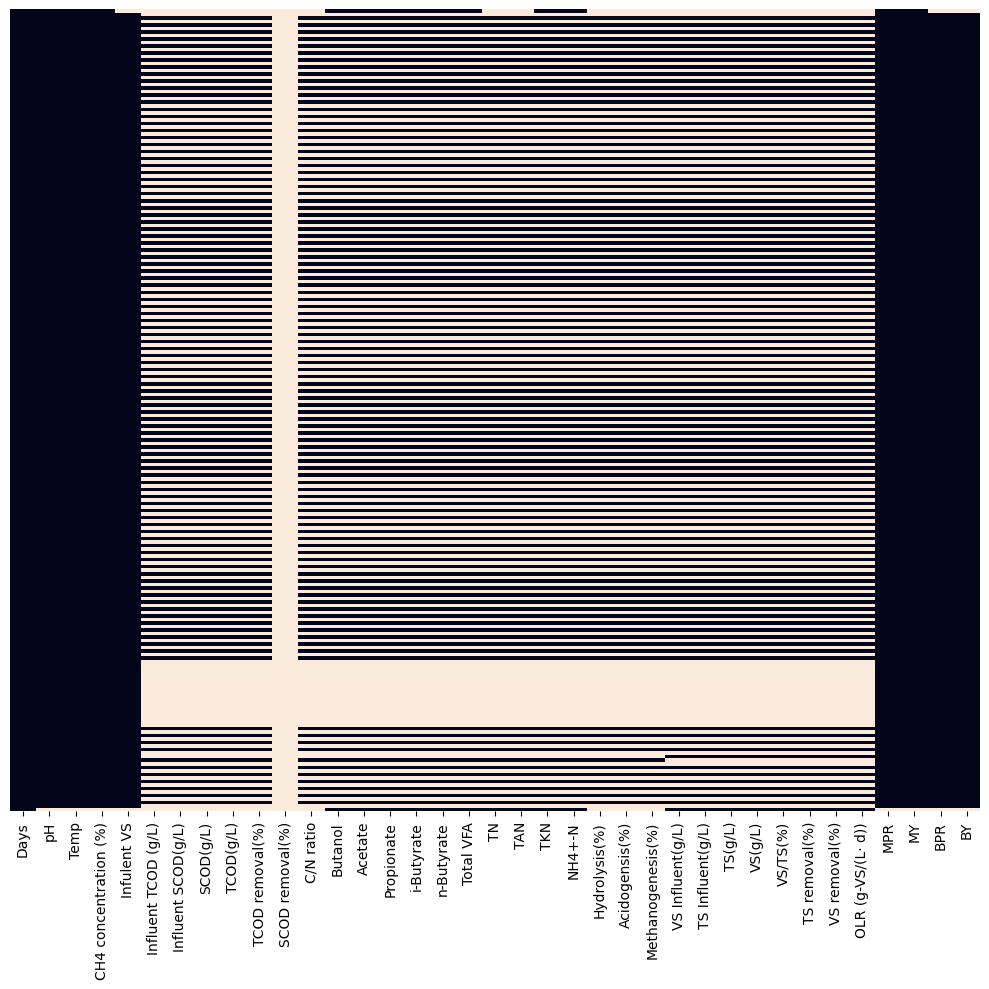

In [13]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [14]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(228, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   228 non-null    int64  
 1   pH                     227 non-null    float64
 2   Temp                   227 non-null    float64
 3   CH4 concentration (%)  227 non-null    object 
 4   Infulent VS            226 non-null    float64
 5   Influent TCOD (g/L)    103 non-null    float64
 6   Influent SCOD(g/L)     103 non-null    float64
 7   SCOD(g/L)              103 non-null    float64
 8   TCOD(g/L)              103 non-null    float64
 9   TCOD removal(%)        103 non-null    float64
 10  SCOD removal(%)        0 non-null      float64
 11  C/N ratio              103 non-null    float64
 12  Butanol                105 non-null    float64
 13  Acetate                105 non-null    float64
 14  Propionate             105 non-null    float64
 

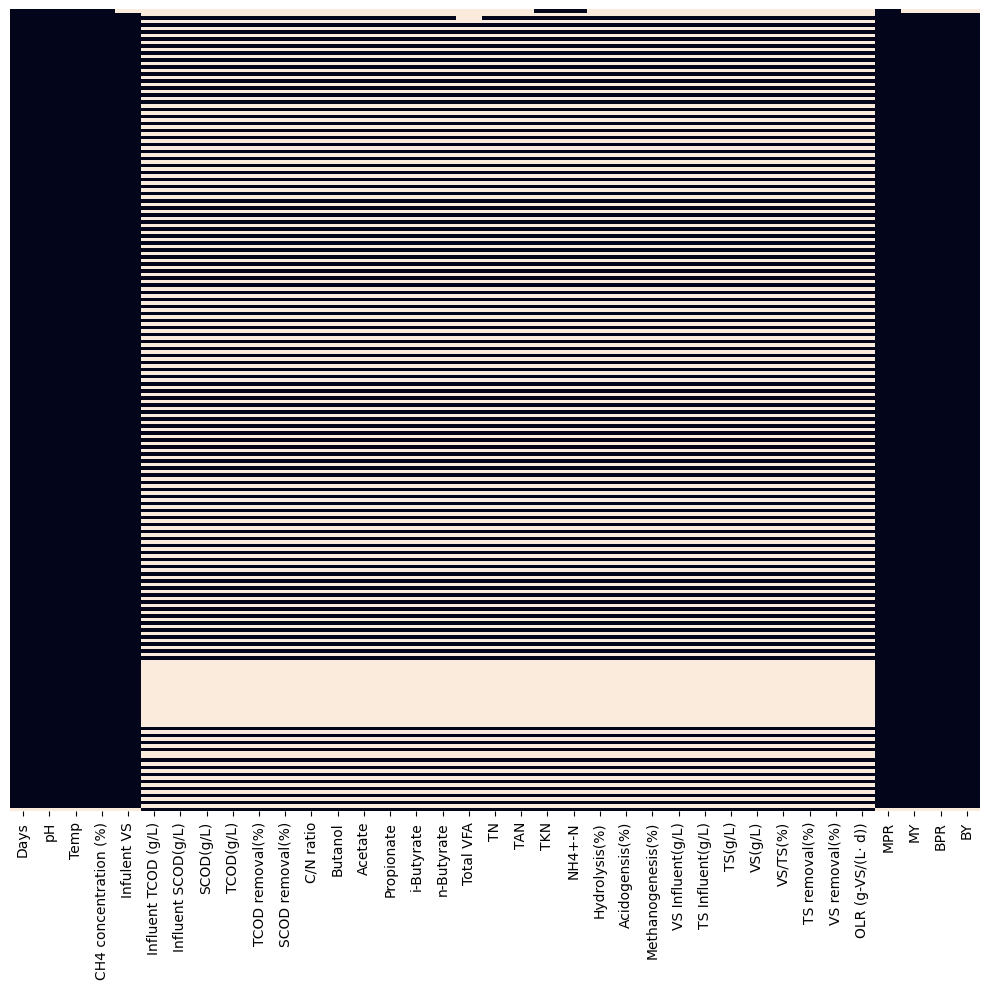

In [15]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [16]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(228, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   227 non-null    float64
 1   pH                     227 non-null    float64
 2   Temp                   227 non-null    float64
 3   CH4 concentration (%)  227 non-null    object 
 4   Infulent VS            226 non-null    float64
 5   Influent TCOD (g/L)    104 non-null    float64
 6   Influent SCOD(g/L)     104 non-null    float64
 7   SCOD(g/L)              104 non-null    float64
 8   TCOD(g/L)              104 non-null    float64
 9   TCOD removal(%)        104 non-null    float64
 10  SCOD removal(%)        104 non-null    float64
 11  C/N ratio              104 non-null    float64
 12  Butanol                104 non-null    float64
 13  Acetate                104 non-null    float64
 14  Propionate             104 non-null    float64
 

In [17]:
print(train.columns)
print(test.columns)

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')
Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influe

In [18]:
pd.set_option('display.max_columns', None)  # 顯示所有列
pd.set_option('display.max_rows', None)  # 顯示所有行
train.describe()

,Days,pH,Temp,Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,BPR,BY
count,228.00000,227.000000,227.000000,226.000000,103.000000,103.000000,103.000000,103.000000,103.000000,0.0,103.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,104.000000,104.000000,105.000000,105.000000,103.000000,103.000000,103.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,227.000000,226.000000,226.000000
mean,113.50000,7.409692,34.656388,12.928009,117.871456,16.547573,11.563204,46.978350,59.815534,NaN,10.370000,180.542857,1539.361905,323.161905,151.295238,288.333333,2302.209524,4659.942308,3132.769231,4661.714286,3117.000000,48.126214,49.398058,48.155340,83.126154,109.654038,43.496058,24.951731,60.346154,68.711538,2.765385,0.480088,0.861018,337.380531
std,65.96211,0.079614,3.940485,0.750095,9.596070,4.978048,6.054846,11.844266,10.696112,NaN,3.324858,332.810122,1072.613210,213.942620,111.349582,309.774287,1367.424627,914.625520,758.296702,910.398747,771.748091,18.182452,16.210829,16.078702,14.656012,11.220153,8.426847,5.768627,6.757620,10.550547,0.483360,0.184280,0.316936,127.088268
min,0.00000,6.890000,17.000000,12.470000,103.000000,8.000000,4.000000,20.180000,31.000000,NaN,4.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2353.000000,1419.000000,2353.000000,1419.000000,11.000000,13.000000,12.000000,60.100000,86.400000,21.850000,9.850000,40.000000,34.000000,2.000000,0.000000,0.230000,92.000000
25%,56.75000,7.410000,35.000000,12.470000,108.970000,12.000000,6.240000,40.550000,54.500000,NaN,8.375000,0.000000,799.000000,194.000000,74.000000,98.000000,1386.000000,4209.000000,2558.500000,4244.000000,2500.000000,41.000000,42.500000,40.000000,66.600000,104.100000,40.385000,21.912500,56.000000,63.000000,2.220000,0.320000,0.592500,221.000000
50%,113.50000,7.430000,35.000000,12.470000,119.000000,17.000000,9.550000,44.580000,60.000000,NaN,9.350000,79.000000,1206.000000,281.000000,132.000000,166.000000,1998.000000,4664.000000,3504.000000,4664.000000,3503.000000,51.000000,51.000000,49.000000,88.100000,109.500000,44.590000,24.995000,61.000000,70.000000,2.940000,0.500000,0.880000,349.000000
75%,170.25000,7.450000,35.000000,13.280000,125.000000,20.000000,16.190000,55.165000,67.000000,NaN,11.115000,120.000000,2258.000000,411.000000,200.000000,270.000000,2777.000000,5158.500000,3732.500000,5141.000000,3731.000000,58.000000,58.000000,56.000000,94.500000,119.100000,46.470000,27.307500,65.000000,76.000000,3.150000,0.580000,1.057500,424.750000
max,227.00000,7.620000,39.000000,14.430000,135.000000,24.640000,32.930000,76.020000,84.000000,NaN,19.460000,1521.000000,5479.000000,1014.000000,416.000000,1422.000000,6678.000000,6513.000000,3996.000000,6513.000000,3996.000000,88.000000,88.000000,85.000000,105.100000,124.200000,63.210000,40.570000,75.000000,89.000000,3.500000,0.940000,1.630000,614.000000


In [19]:
# 其餘ND值用前後平均填充(線性插值)
train = train.replace("ND", pd.NA)
test = test.replace("ND" , pd.NA)

# 將百分比轉換為數值
percentage_cols = ["SCOD removal(%)", "TCOD removal(%)", "Hydrolysis(%)", "Acidogensis(%)", "Methanogenesis(%)", "VS/TS(%)", "TS removal(%)", "VS removal(%)", "CH4 concentration (%)"]
for col in percentage_cols:
    # 確保所有值為字串型態
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    # 如果該值包含數字和%，則將 "%" 字符去掉並轉換為浮點數；否則直接轉換為浮點數
    train[col] = train[col].apply(lambda x: float(x.replace("%","")) / 100.0 if "%" in x else float(x) if x.replace(".","").isdigit() else np.nan)
    test[col] = test[col].apply(lambda x: float(x.replace("%","")) / 100.0 if "%" in x else float(x) if x.replace(".","").isdigit() else np.nan)

    
# 轉換這一列的數據類型為數字
train["MY"] = pd.to_numeric(train["MY"], errors='coerce')
test["MY"] = pd.to_numeric(test["MY"], errors='coerce')

train["VS/TS(%)"] = pd.to_numeric(train["VS/TS(%)"], errors='coerce')
test["VS/TS(%)"] = pd.to_numeric(test["VS/TS(%)"], errors='coerce')

train["CH4 concentration (%)"] = pd.to_numeric(train["CH4 concentration (%)"], errors='coerce')
test["CH4 concentration (%)"] = pd.to_numeric(test["CH4 concentration (%)"], errors='coerce')

train["MCH4 concentration (%)"] = pd.to_numeric(train["CH4 concentration (%)"], errors='coerce')
test["MCH4 concentration (%)"] = pd.to_numeric(test["CH4 concentration (%)"], errors='coerce')

train["SCOD removal(%)"] = pd.to_numeric(train["CH4 concentration (%)"], errors='coerce')
test["SCOD removal(%)"] = pd.to_numeric(test["CH4 concentration (%)"], errors='coerce')

# # 處理ND值，如果某個特徵有連續20個ND，就刪除該特徵
# features_to_drop = [column for column in train.columns if (train[column] == "ND").rolling(window=10).sum().max() >= 20]
# train = train.drop(columns=features_to_drop)

# 使用前後的值加總除以2進行插值
train = train.interpolate(method="linear")
test = test.interpolate(method="linear")

# 使用線性插值填充缺失值
train = train.interpolate(method="linear", limit_direction="both")
test = test.interpolate(method="linear", limit_direction="both")


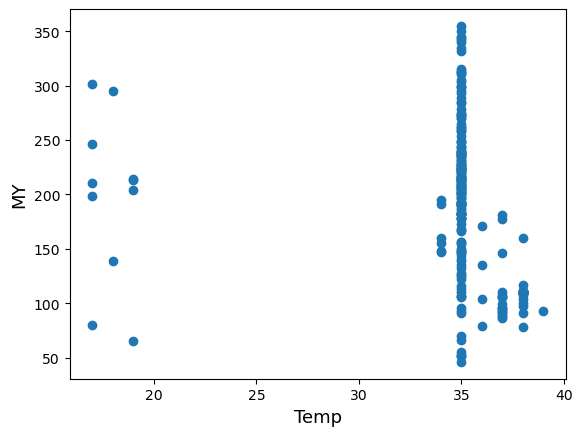

In [20]:
fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
ax.scatter(x = train['Temp'],y = train['MY'])   #繪製點散圖
plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
plt.xlabel('Temp',fontsize = 13)
plt.show()

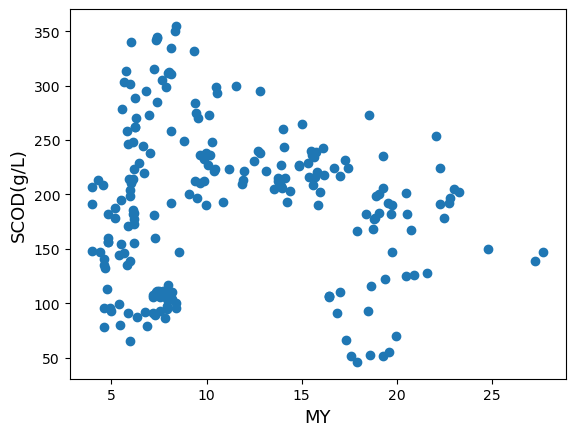

In [21]:
#異常值處理
train = train.drop(train[(train['SCOD(g/L)']>30) & (train['MY']<200)].index)

fig, ax = plt.subplots()
ax.scatter(train['SCOD(g/L)'], train['MY'])
plt.ylabel('SCOD(g/L)',fontsize = 13)   #fontsize = 13 字體大小
plt.xlabel('MY',fontsize = 13)
plt.show()

In [27]:

p_values = []

# 只針對數值型欄位進行操作
for column in train.select_dtypes(include=[np.number]).columns:  
    # 處理NaN值
    train_col = train[column].dropna()
    test_col = test[column].dropna()
    
    # 檢查是否有足夠的樣本
    if len(train_col) < 2 or len(test_col) < 2:
        print(f"欄位 {column} 的數據不足以進行 t 檢定")
        continue
    
    # 使用t檢定比較每個變數
    t_stat, p_val = stats.ttest_ind(train_col, test_col)
    p_values.append(p_val)

# 使用 Bonferroni 方法進行多重比較校正
alpha = 0.05  # 顯著性水平
n_tests = len(p_values)
p_values_corrected = np.array(p_values) * n_tests  # 進行校正

# 打印每個變數及其經過校正的 p 值
for column, p_val in zip(train.select_dtypes(include=[np.number]).columns, p_values_corrected):
    is_significant = p_val < alpha  # 判斷是否顯著
    print(f'{column}: {"顯著" if is_significant else "不顯著"} (p-value: {p_val})')


Days: 不顯著 (p-value: 36.13271180540384)
pH: 不顯著 (p-value: 4.8232187377546225)
Temp: 不顯著 (p-value: 8.6388095523033)
CH4 concentration (%): 不顯著 (p-value: 0.35684304561222907)
Infulent VS: 不顯著 (p-value: 37.127243071293925)
Influent TCOD (g/L): 不顯著 (p-value: 37.81650743605575)
Influent SCOD(g/L): 不顯著 (p-value: 37.403792777359634)
SCOD(g/L): 顯著 (p-value: 2.6077808436739734e-11)
TCOD(g/L): 不顯著 (p-value: 0.14395105727713384)
TCOD removal(%): 不顯著 (p-value: 0.42196964739591325)
SCOD removal(%): 不顯著 (p-value: 0.35684304561222907)
C/N ratio: 不顯著 (p-value: 0.8799251711932295)
Butanol: 顯著 (p-value: 4.965915227083216e-11)
Acetate: 不顯著 (p-value: 24.363052103641238)
Propionate: 不顯著 (p-value: 32.777894137531256)
i-Butyrate: 不顯著 (p-value: 0.16893344806168556)
n-Butyrate: 顯著 (p-value: 0.005536632615316919)
Total VFA: 不顯著 (p-value: 17.25728207987315)
TN: 顯著 (p-value: 5.397573720841307e-05)
TAN: 不顯著 (p-value: 0.06811492064396081)
TKN: 顯著 (p-value: 3.089075815273774e-05)
NH4+-N: 不顯著 (p-value: 0.0812417097744

In [ ]:
# 將顯著的變數作為特徵
significant_features = ['SCOD(g/L)', 'Butanol', 'n-Butyrate', 'TN', 'TKN', 'VS/TS(%)']
X_train = train[significant_features]
y_train = train['MPR']  # 將'MPR'作為目標變數

# 創建並訓練隨機森林回歸模型
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 在測試集上進行預測
X_test = test[significant_features]
y_test = test['MPR']
y_pred = rf_model.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = rf_model.score(X_test, y_test)

print('均方誤差（MSE）：', mse)
print('決定係數（R-squared）：', r2)


In [29]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # 創建一個空的DataFrame來存儲結果
# tukey_results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Difference', 'Lower CI', 'Upper CI', 'Reject Null'])

# # 進行所有變數之間的Tukey's HSD比較
# for i in range(len(train.select_dtypes(include=[np.number]).columns)):
#     for j in range(i+1, len(train.select_dtypes(include=[np.number]).columns)):
#         variable_1 = train.select_dtypes(include=[np.number]).columns[i]
#         variable_2 = train.select_dtypes(include=[np.number]).columns[j]
        
#         # 執行Tukey's HSD比較
#         tukey_results = pairwise_tukeyhsd(train[variable_1], train[variable_2])
        
#         # 提取重要結果
#         difference = tukey_results.meandiffs[0]
#         lower_ci = tukey_results.confint[0][0]
#         upper_ci = tukey_results.confint[0][1]
#         reject_null = tukey_results.reject[0]
        
#         # 將結果添加到DataFrame中
#         tukey_results_df = tukey_results_df.append({'Variable 1': variable_1,
#                                                     'Variable 2': variable_2,
#                                                     'Difference': difference,
#                                                     'Lower CI': lower_ci,
#                                                     'Upper CI': upper_ci,
#                                                     'Reject Null': reject_null},
#                                                    ignore_index=True)

# # 打印結果
# print(tukey_results_df)


In [ ]:


# # 選擇顯著差異的變數對進行進一步分析
# significant_pairs = tukey_results_df[tukey_results_df['Reject Null']]

# for idx, row in significant_pairs.iterrows():
#     variable_1 = row['Variable 1']
#     variable_2 = row['Variable 2']
    
#     # 可以進行進一步的分析，例如比較兩個變數對的分布或統計量
#     # 假設你想研究 SCOD(g/L) 和 TCOD(g/L) 這兩個變數對的差異
#     if variable_1 == 'SCOD(g/L)' and variable_2 == 'TCOD(g/L)':
#         data_variable_1 = train[variable_1]
#         data_variable_2 = train[variable_2]
        
#         # 可以繪製箱形圖或直方圖來比較兩個變數的分布
#         plt.figure()
#         plt.boxplot([data_variable_1, data_variable_2])
#         plt.xlabel('Variable')
#         plt.ylabel('Value')
#         plt.title('Comparison of SCOD(g/L) and TCOD(g/L)')
#         plt.xticks([1, 2], ['SCOD(g/L)', 'TCOD(g/L)'])
#         plt.show()
        
#         # 可以計算兩個變數的統計量，例如均值、標準差等
#         mean_variable_1 = data_variable_1.mean()
#         mean_variable_2 = data_variable_2.mean()
#         std_variable_1 = data_variable_1.std()
#         std_variable_2 = data_variable_2.std()
        
#         print(f"Variable 1: {variable_1}")
#         print(f"Mean: {mean_variable_1}, Standard Deviation: {std_variable_1}")
#         print(f"Variable 2: {variable_2}")
#         print(f"Mean: {mean_variable_2}, Standard Deviation: {std_variable_2}")


In [ ]:

# # 使用線性插值來填充缺失的值
# train["MY"] = train["MY"].interpolate(method="linear", limit_direction="both")
# test["MY"] = test["MY"].interpolate(method="linear", limit_direction="both")

# train["CH4 concentration (%)"] = train["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")
# test["CH4 concentration (%)"] = test["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")


In [ ]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [ ]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [ ]:
# print(test['MY'].head())  # 查看前5行
# print(test['MY'].tail())  # 查看後5行


In [ ]:
# 確定目標變量和特徵變量
targets = ["MPR", "MY", "BPR", "BY"]
features = [col for col in train.columns if col not in targets]

In [ ]:
#熱圖查看數據相關性，數值越接近 1 或 -1 的變數對其相關性越高，0為無相關。
for target in targets :
    k = 10
    corrmat = train.corr()
    cols = corrmat.nlargest(k, target)[target].index
    cm = np.corrcoef(train[cols].values.T)
    
    fig, ax = plt.subplots(figsize=(18, 18))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
    plt.title(f"Top {k} Correlations with {target}")
    plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 定義要進行 One-Hot 編碼的欄位
columns_to_encode = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
                     'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
                     'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
                     'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
                     'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
                     'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
                     'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
                     'MPR', 'MY', 'BPR', 'BY']

# 初始化 One-Hot 編碼器
encoder = OneHotEncoder()

# 對 train 資料進行 One-Hot 編碼
train_encoded = encoder.fit_transform(train[columns_to_encode])

# 對 test 資料進行 One-Hot 編碼
test_encoded = encoder.transform(test[columns_to_encode])

# 檢查編碼後的資料維度
print('編碼後訓練資料的維度:', train_encoded.shape)
print('編碼後測試資料的維度:', test_encoded.shape)
